In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [31]:
#f = r.TFile("./data/results_1000muons_col6_outer_bottom.root")
f = r.TFile("./data/simutree_muonsAndPositrons_col6_inner_top.root")
#f = r.TFile("./data/results_Col_6_8_4corners.root")
t = f.Get("trajectoryAnalyzer/t")
t.Print()

******************************************************************************
*Tree    :t         : t                                                      *
*Entries :  1237468 : Total =       334119321 bytes  File  Size =  147073127 *
*        :          : Tree compression factor =   2.27                       *
******************************************************************************
*Br    0 :caloX     : vector<float>                                          *
*Entries :  1237468 : Total  Size=   38097247 bytes  File Size  =   24410408 *
*Baskets :     1458 : Basket Size=      32000 bytes  Compression=   1.56     *
*............................................................................*
*Br    1 :caloY     : vector<float>                                          *
*Entries :  1237468 : Total  Size=   38097247 bytes  File Size  =   25084685 *
*Baskets :     1458 : Basket Size=      32000 bytes  Compression=   1.52     *
*...................................................

CPU times: user 14.6 s, sys: 3.84 s, total: 18.4 s
Wall time: 34.3 s


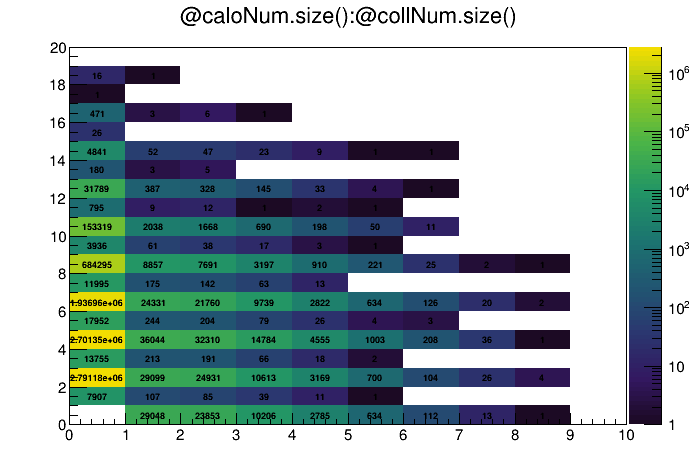

In [3]:
%%time

c = r.TCanvas()

t.Draw("@caloNum.size():@collNum.size()>>hist(10,0,10,20,0,20)","","colz text")

c.SetLogz()
c.Draw()

---

### Now lets select a position on the collimator to look at the triples

In [23]:
def transformAngle(angle):
    #return angle
    if(angle <= 90):
        return 90 - angle
    elif(angle > 90 and angle <= 270):
        return 90 - angle
    else:
        return 360 + 90 - angle

def getCut( collimator, angle1_12, angle2_12 ):
    '''
        Define a cut based on the collimator number and angles from 12 o'clock on the collimator
    '''
    
    #convert to the coordinates preferred by the 
    angle1 = min( transformAngle(angle1_12) , transformAngle(angle2_12) )
    angle2 = max( transformAngle(angle1_12) , transformAngle(angle2_12) )
    
    angles=np.linspace(angle1*(math.pi/180),angle2*math.pi/180,100) #convert to radians
    #print(angles)
    radius = 55
    center = (7112,0)

    cutg = r.TCutG("mycut",len(angles)+2)
    cutg.SetPoint(0, center[0], center[1])
    for i, anglei in enumerate(angles):
        cutg.SetPoint(i+1, center[0]+radius*math.cos(anglei), center[1] + radius*math.sin(anglei))
    cutg.SetPoint(len(angles)+1, center[0], center[1])
    cutg.SetFillColorAlpha(2,0.1)

    condition = "collNum == "+str(collimator)+" && @collNum.size() > 0"# && @caloNum.size() > 5"
    #condition += ( " && -1*TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112) + TMath::Pi()/2  >= "+str(angles[0])
    #              +" && -1*TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112) + TMath::Pi()/2  <= "+str(angles[len(angles)-1])
    #             )
    condition += ( " && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= "+str(angles[0])
                  +" && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= "+str(angles[len(angles)-1])
                 )
    return (cutg, condition)

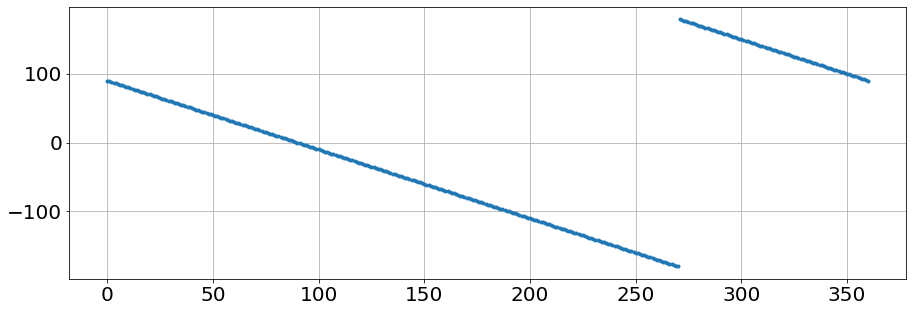

In [24]:
fig,ax = plt.subplots(figsize=(15,5))
ding = [x for x in range(361)]
dong = [transformAngle(x) for x in ding]

plt.plot(ding,dong,".")
plt.grid()
plt.show()

In [25]:
print(getCut(6, 40, 60)[1])
print(getCut(6, 0, 90)[1])
print(getCut(6, 110, 160)[1])
print(getCut(6, 140, 260)[1])

collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= 0.5235987755982988 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= 0.8726646259971648
collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= 0.0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= 1.5707963267948966
collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= -1.2217304763960306 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= -0.3490658503988659
collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= -2.9670597283903604 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= -0.8726646259971648


collNum == 6 && @collNum.size() > 0 && @caloNum.size() >= 5 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= 1.5707963267948966 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= 2.6179938779914944
Number of Muons: 4943


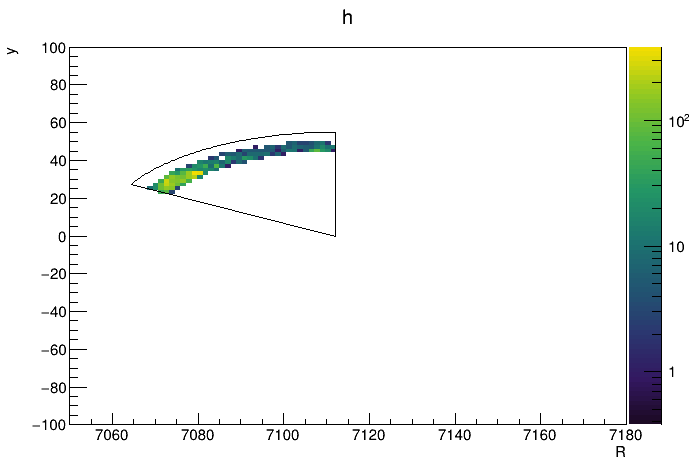

In [7]:
c = r.TCanvas()

cutg, condition = getCut(6, 300, 360)
print(condition)

h = r.TH2I("h","h; R; y",100,7050,7180, 100,-100,100)
#t.Draw("collY[0]:TMath::Sqrt(collX[0]**2 + collZ[0]**2)","","colz")
n = t.Draw("collY[0]:TMath::Sqrt(collX[0]**2 + collZ[0]**2)>>h",condition,"goff")
print("Number of Muons:", n)
h.Draw("colz")
cutg.Draw("same")
c.SetLogz()
c.Draw()

collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= 1.5707963267948966 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= 2.6179938779914944
Number of Muons: 25144


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


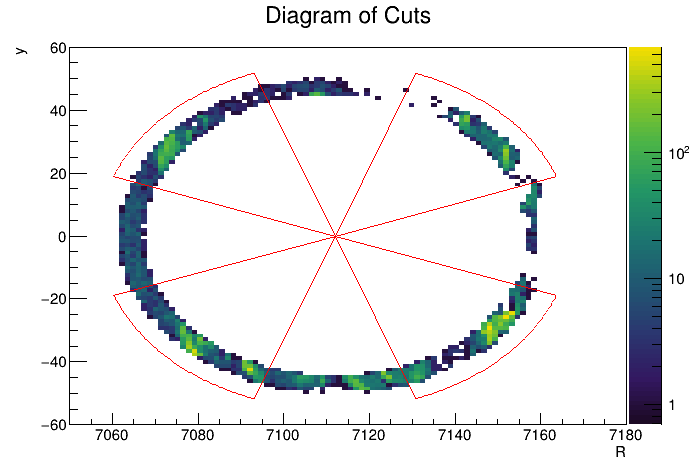

In [40]:
c = r.TCanvas()

cutg, condition = getCut(6, 300, 360)
print(condition)

h = r.TH2I("h","Diagram of Cuts; R; y",100,7050,7180, 100,-60,60)
#t.Draw("collY[0]:TMath::Sqrt(collX[0]**2 + collZ[0]**2)","","colz")
n = t.Draw("collY[0]:TMath::Sqrt(collX[0]**2 + collZ[0]**2)>>h","","goff")
print("Number of Muons:", n)
h.Draw("colz")
cuts = []
for angle1, angle2 in angles:
    cutg, condition = getCut(6, angle1, angle2)
    cuts.append(cutg.Clone(str(angle1)))
for cut in cuts:
    cut.SetLineColor(2)
    cut.Draw("SAME")
c.SetLogz()
c.Draw()

Number of Muons: 312116


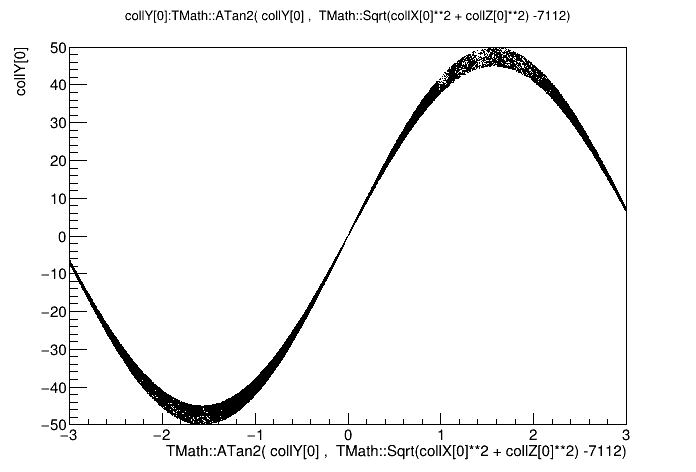

In [8]:
c = r.TCanvas()

n = t.Draw("collY[0]:TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)","","")
print("Number of Muons:", n)
#c.SetLogy()

c.Draw()

In [9]:
for i, e in enumerate(t):
    if(e.caloNum.size() < 10):
        continue
    print(([x for x in e.caloNum]))
    if(i > 1000):
        break

[2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
[6, 6, 7, 7, 8, 8, 9, 9, 11, 11, 12, 12]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
[6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
[1, 1, 2, 2, 3, 3, 6, 6, 7, 7]
[5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
[5, 5, 6, 6, 7, 7, 9, 9, 10, 10]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
[5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
[7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
[5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
[4, 4, 5, 5, 6, 6, 7, 7, 8, 8]
[7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
[5, 5, 6, 6, 9, 9, 10, 10, 11, 11]
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
[4, 4, 5, 5, 6, 6, 7, 7, 9, 9]
[1, 1, 2, 2, 4, 4, 5, 5, 6, 6]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
[5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
[3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8]
[6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
[6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 10, 10

In [27]:
%%time

alltrips = []
allcolls = []

angles = [[x+20, x+70] for x in [0,90,180,270]]

for collimator in [6,8]:
    for angle1,angle2 in angles:
        cutg, condition = getCut(collimator, angle1, angle2)
        print(condition)
        
        ftemp = r.TFile("./data/temp_tree_storage.root","recreate")
        ftemp.cd()
        ti = t.CopyTree(condition)
        ti.SetName(str(collimator)+"_"+str(angle1)+"_"+str(angle2))
        #ti.Print()
        #print(ti.GetEntries())
        ftemp.Write()
        

        h = r.TH2I("h","Collimator Hits; R; y",100,7050,7150, 100,-100,100)
        n = ti.Draw("collY[0]:TMath::Sqrt(collX[0]**2 + collZ[0]**2)>>h","","goff")
        print("Number of muons:", n)
        allcolls.append(h.Clone("colHits_"+str(collimator)+"_"+str(angle1)+"_"+str(angle2)))
        allcolls[len(allcolls) - 1].SetDirectory(0)
        
        alltriples = []
        for triple in range(3):
            calos = []
            for i in range(24):
                #calos.append( pyTH2(None, 60, [6500,7500], 60, [-200,200]) )
                calos.append( r.TH2D("calo_"+str(i+1)+"_tripleHit_"+str(triple+1)+"_"+str(collimator)+"_"+str(angle1)+"_"+str(angle2), 
                                     "Calo "+str(i+1)+" Triple Hit "+str(triple+1)+" ; R [mm]; y [mm]", 
                                     60, 6500, 7500,
                                     60, -200,200) )
                calos[i].SetDirectory(0)
            alltriples.append(calos)

        print("hi")

        for i, e in enumerate(ti):
            #if((e.eCaloNum.size() < 3) or (e.eCaloNum.size() > 10)):
            #if((e.caloNum.size() < 3) or (e.collNum.size() < 1) or ()):
            #    continue
            if( e.caloNum.size() <= 5):
                continue
            if(False):
                print([x for x in e.caloNum])
                print([x for x in e.caloY])
                print([math.sqrt(x**2 + y**2) for (x,y) in zip(e.caloZ, e.caloX)])
                print([x for x in e.caloE])
            #firstcalo = e.eCaloNum[0]
            #ri = np.sqrt(e.eCaloX[0]**2 + e.eCaloZ[0]**2)
            #yi = e.eCaloY[0]
            calos = [x for x in e.caloNum]
            rs = [math.sqrt(x**2 + y**2) for (x,y) in zip(e.caloZ, e.caloX)]
            ys = [x for x in e.caloY]

            for triple in range(3):
                #print("hi", triple)
                alltriples[triple][calos[triple] - 1].Fill( rs[triple*2+1], ys[triple*2+1] )

            #calos[firstcalo-1].fill( ri, yi  )
            #calos[firstcalo-1].Fill( ri, yi  )
            #if(i > 10):
            #    break
        
        for x in alltriples:
            for y in x:
                y.Scale(1./n)
            
        print("hi2")
        alltrips.append(alltriples)
        ftemp.Close()
        #break


collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= 0.3490658503988659 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= 1.2217304763960306
Number of muons: 24358
hi
hi2
collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= -1.2217304763960306 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= -0.3490658503988659
Number of muons: 21871
hi
hi2
collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= -2.792526803190927 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <= -1.9198621771937625
Number of muons: 13582
hi
hi2
collNum == 6 && @collNum.size() > 0 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  >= 1.9198621771937625 && TMath::ATan2( collY[0] ,  TMath::Sqrt(collX[0]**2 + collZ[0]**2) -7112)  <

In [28]:
#print(alltrips)
print(allcolls)

[<ROOT.TH2I object ("colHits_6_20_70") at 0x7f46771aa6f0>, <ROOT.TH2I object ("colHits_6_110_160") at 0x7f4676f95910>, <ROOT.TH2I object ("colHits_6_200_250") at 0x7ffff35d5f30>, <ROOT.TH2I object ("colHits_6_290_340") at 0x7f4677018b40>, <ROOT.TH2I object ("colHits_8_20_70") at 0x7f4676f7c2c0>, <ROOT.TH2I object ("colHits_8_110_160") at 0x7f46771dc320>, <ROOT.TH2I object ("colHits_8_200_250") at 0x7f4676fad410>, <ROOT.TH2I object ("colHits_8_290_340") at 0x7f46770bbd40>]


In [29]:
outfile="./data/triples_bycollimator_by_angle.root"
fout = r.TFile(outfile,"RECREATE")
if(False):
    for x in allHists:
        for y in x:
            if("ROOT" in str(type(y))):
                y.Write()
if(True):
    for x in alltrips:
        for y in x:
            for z in y:
                z.Write()
if(True):
    for x in allcolls:
        x.Write()
fout.Write()
fout.Close()